In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
aisles = pd.read_csv("../input/instacart-market-basket-analysis/aisles.csv")
departments = pd.read_csv("../input/instacart-market-basket-analysis/departments.csv")
order_products_train = pd.read_csv("../input/instacart-market-basket-analysis/order_products__prior.csv")
order_products_test = pd.read_csv("../input/instacart-market-basket-analysis/order_products__train.csv")
orders = pd.read_csv("../input/instacart-market-basket-analysis/orders.csv")
products = pd.read_csv("../input/instacart-market-basket-analysis/products.csv")

In [3]:
orders.fillna(0,inplace=True)

In [4]:
train_df1 = order_products_train.groupby("order_id")["add_to_cart_order"].max().reset_index()
train_df2 = order_products_train.groupby("order_id")["reordered"].sum().reset_index()
train_df2.drop("order_id",axis =1,inplace = True)
train_df1.head()
train_df2.head()

,reordered
0,6
1,8
2,12
3,21
4,0


In [5]:
frames = [train_df1,train_df2]
train_df = pd.concat(frames,axis = 1)
train_df

,order_id,add_to_cart_order,reordered
0,2,9,6
1,3,8,8
2,4,13,12
3,5,26,21
4,6,3,0
...,...,...,...
3214869,3421079,1,0
3214870,3421080,9,4
3214871,3421081,7,0
3214872,3421082,7,4


In [6]:
test_df1 = order_products_test.groupby("order_id")["add_to_cart_order"].max().reset_index()
test_df2 = order_products_test.groupby("order_id")["reordered"].sum().reset_index()
test_df3 = order_products_test.groupby("order_id")["product_id"].unique().reset_index()
test_df2.drop("order_id",axis =1,inplace = True)
test_df1.head()
test_df2.head()

,reordered
0,4
1,6
2,1
3,5
4,45


In [7]:
frames = [test_df1,test_df2]
test_df = pd.concat(frames,axis = 1)
test_df

,order_id,add_to_cart_order,reordered
0,1,8,4
1,36,8,6
2,38,9,1
3,96,7,5
4,98,49,45
...,...,...,...
131204,3421049,6,1
131205,3421056,5,3
131206,3421058,8,7
131207,3421063,4,4


In [8]:
frames = [train_df,test_df]
grouped_df1 = pd.concat(frames, axis = 0)
grouped_df1

,order_id,add_to_cart_order,reordered
0,2,9,6
1,3,8,8
2,4,13,12
3,5,26,21
4,6,3,0
...,...,...,...
131204,3421049,6,1
131205,3421056,5,3
131206,3421058,8,7
131207,3421063,4,4


In [9]:
order = orders[["order_id","user_id","order_number","days_since_prior_order","eval_set"]]
order

,order_id,user_id,order_number,days_since_prior_order,eval_set
0,2539329,1,1,0.0,prior
1,2398795,1,2,15.0,prior
2,473747,1,3,21.0,prior
3,2254736,1,4,29.0,prior
4,431534,1,5,28.0,prior
...,...,...,...,...,...
3421078,2266710,206209,10,29.0,prior
3421079,1854736,206209,11,30.0,prior
3421080,626363,206209,12,18.0,prior
3421081,2977660,206209,13,7.0,prior


In [10]:
order.drop(order.loc[order['eval_set']=='test'].index, inplace=True)
order

,order_id,user_id,order_number,days_since_prior_order,eval_set
0,2539329,1,1,0.0,prior
1,2398795,1,2,15.0,prior
2,473747,1,3,21.0,prior
3,2254736,1,4,29.0,prior
4,431534,1,5,28.0,prior
...,...,...,...,...,...
3421078,2266710,206209,10,29.0,prior
3421079,1854736,206209,11,30.0,prior
3421080,626363,206209,12,18.0,prior
3421081,2977660,206209,13,7.0,prior


In [11]:
orders1= order.groupby(['user_id']).sum()
orders1.head()

,order_id,order_number,days_since_prior_order
user_id,,,
1,21157951,66,190.0
2,26521571,120,228.0
3,22368790,78,133.0
4,8717055,15,55.0
5,9247893,15,46.0


In [12]:
orders2 = order.groupby(['user_id']).count()
orders2 = orders2.drop("eval_set",axis = 1)
orders2.head()

,order_id,order_number,days_since_prior_order
user_id,,,
1,11,11,11
2,15,15,15
3,12,12,12
4,5,5,5
5,5,5,5


In [13]:
data1 = pd.DataFrame(orders1/(orders2))
data1 = data1.drop(["order_id","order_number"],axis = 1)
data1.head()

,days_since_prior_order
user_id,
1,17.272727
2,15.200000
3,11.083333
4,11.000000
5,9.200000


In [14]:
data2 = pd.DataFrame(orders2['order_number'])
data2.head()

,order_number
user_id,
1,11
2,15
3,12
4,5
5,5


In [15]:
frames = [data1,data2]
grouped_df2 = pd.concat(frames,axis =1)
grouped_df2.head()

,days_since_prior_order,order_number
user_id,,
1,17.272727,11
2,15.200000,15
3,11.083333,12
4,11.000000,5
5,9.200000,5


In [16]:
grouped_df2.columns = ['average_days_since_prior_order','number_of_visits']
grouped_df2.reset_index(level=0, inplace=True)
grouped_df2

,user_id,average_days_since_prior_order,number_of_visits
0,1,17.272727,11
1,2,15.200000,15
2,3,11.083333,12
3,4,11.000000,5
4,5,9.200000,5
...,...,...,...
206204,206205,12.500000,4
206205,206206,3.716418,67
206206,206207,13.437500,16
206207,206208,7.285714,49


In [17]:
visits = grouped_df2.drop(["user_id","average_days_since_prior_order"],axis = 1)
visits

,number_of_visits
0,11
1,15
2,12
3,5
4,5
...,...
206204,4
206205,67
206206,16
206207,49


In [18]:
grouped_df1

,order_id,add_to_cart_order,reordered
0,2,9,6
1,3,8,8
2,4,13,12
3,5,26,21
4,6,3,0
...,...,...,...
131204,3421049,6,1
131205,3421056,5,3
131206,3421058,8,7
131207,3421063,4,4


In [19]:
x = order.drop(["order_number","days_since_prior_order","eval_set"],axis = 1)


In [20]:
merge1 = pd.merge(left = grouped_df1, right = x, how = "left", on = "order_id")
merge1

,order_id,add_to_cart_order,reordered,user_id
0,2,9,6,202279
1,3,8,8,205970
2,4,13,12,178520
3,5,26,21,156122
4,6,3,0,22352
...,...,...,...,...
3346078,3421049,6,1,189544
3346079,3421056,5,3,83898
3346080,3421058,8,7,136952
3346081,3421063,4,4,169679


In [21]:
merge2 = pd.merge(left = merge1 ,right = grouped_df2, how = "left", on = "user_id")
merge2

,order_id,add_to_cart_order,reordered,user_id,average_days_since_prior_order,number_of_visits
0,2,9,6,202279,20.111111,9
1,3,8,8,205970,8.884615,26
2,4,13,12,178520,6.385965,57
3,5,26,21,156122,6.547170,53
4,6,3,0,22352,21.777778,9
...,...,...,...,...,...,...
3346078,3421049,6,1,189544,15.250000,4
3346079,3421056,5,3,83898,3.230769,13
3346080,3421058,8,7,136952,9.600000,20
3346081,3421063,4,4,169679,7.133333,30


In [22]:
merge2.sort_values("user_id")

,order_id,add_to_cart_order,reordered,user_id,average_days_since_prior_order,number_of_visits
2118491,2254736,5,5,1,17.272727,11
2396411,2550362,9,6,1,17.272727,11
3260848,1187899,11,10,1,17.272727,11
405352,431534,8,5,1,17.272727,11
2253888,2398795,6,3,1,17.272727,11
...,...,...,...,...,...,...
1448938,1542354,15,8,206209,17.142857,14
588294,626363,20,14,206209,17.142857,14
2129739,2266710,9,3,206209,17.142857,14
2994244,3186442,2,1,206209,17.142857,14


In [23]:
train_table = merge2.groupby("user_id").sum()
train_table = train_table.drop(["order_id","number_of_visits"],axis = 1)
train_table.reset_index(level=0, inplace=True)
train_table

,user_id,add_to_cart_order,reordered,average_days_since_prior_order
0,1,70,51,190.0
1,2,226,105,228.0
2,3,88,55,133.0
3,4,18,1,55.0
4,5,46,18,46.0
...,...,...,...,...
206204,206205,51,14,50.0
206205,206206,285,135,249.0
206206,206207,223,131,215.0
206207,206208,677,479,357.0


In [24]:
frames = [train_table,visits]
train_table = pd.concat(frames,axis = 1)
train_table

,user_id,add_to_cart_order,reordered,average_days_since_prior_order,number_of_visits
0,1,70,51,190.0,11
1,2,226,105,228.0,15
2,3,88,55,133.0,12
3,4,18,1,55.0,5
4,5,46,18,46.0,5
...,...,...,...,...,...
206204,206205,51,14,50.0,4
206205,206206,285,135,249.0,67
206206,206207,223,131,215.0,16
206207,206208,677,479,357.0,49


**MODEL**

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [26]:
X = train_table.iloc[:,[1,4]].values


In [27]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',  max_iter=300, n_init=10,
                   random_state=0)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    wcss.append(inertia)
    print('For n_cluster =', i, 'The inertia is:', inertia)


For n_cluster = 1 The inertia is: 8809160109.872322
For n_cluster = 2 The inertia is: 3065975597.8964486
For n_cluster = 3 The inertia is: 1596618359.6239784
For n_cluster = 4 The inertia is: 987031742.7859278
For n_cluster = 5 The inertia is: 681905575.8622816
For n_cluster = 6 The inertia is: 498826455.8855334
For n_cluster = 7 The inertia is: 382472923.436518
For n_cluster = 8 The inertia is: 307098408.9691384
For n_cluster = 9 The inertia is: 249547181.80235484
For n_cluster = 10 The inertia is: 206017426.0421994


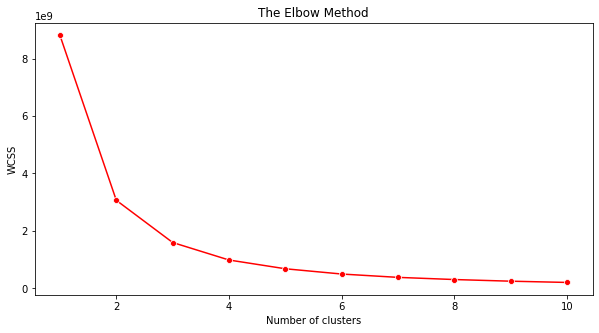

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [30]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [31]:
kmeans.cluster_centers_

array([[ 155.37858988,   16.47673567],
       [ 882.18156086,   61.66922766],
       [ 549.90590263,   45.76966825],
       [  49.78175077,    7.5536265 ],
       [ 315.25530692,   29.4512831 ],
       [1434.92288761,   74.03281378]])

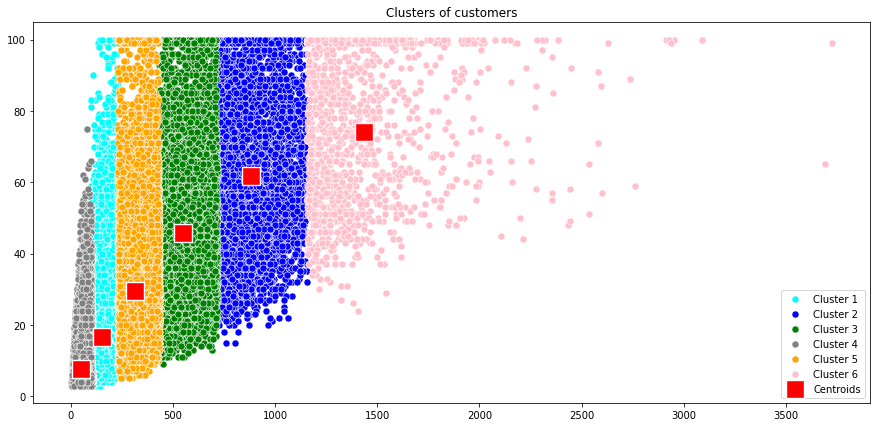

In [32]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'aqua', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], color = 'pink', label = 'Cluster 6',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.show()